In [1]:
from collections import Counter

import joblib
import minisom
import numpy as np
import seaborn as sb

import laytr

First, we need to create a SOM

In [2]:
kfeats = joblib.load("../repo_utils/kfeat.jl")
som = minisom.MiniSom(15, 15, 64, sigma=1.5, learning_rate=1,
                      topology='hexagonal',
                      neighborhood_function='gaussian', 
                      activation_distance='euclidean',
                      random_seed=2023
                     )
som.train_batch(kfeats, 10_000, verbose=True)
joblib.dump(som, 'chr22_example.som')

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.10895308115856686


['chr22_example.som']

Next, we map our data to the SOM. We can do this via the command line with `laytr map` or programmatically.
This will allow us to QC the SOM and see how many of our rows map to each neuron.

In [3]:
m_map = laytr.map_to_som(kfeats, som)

umatrix = np.zeros(som._weights.shape[:2])
for idx in m_map:
    umatrix[tuple(idx)] += 1

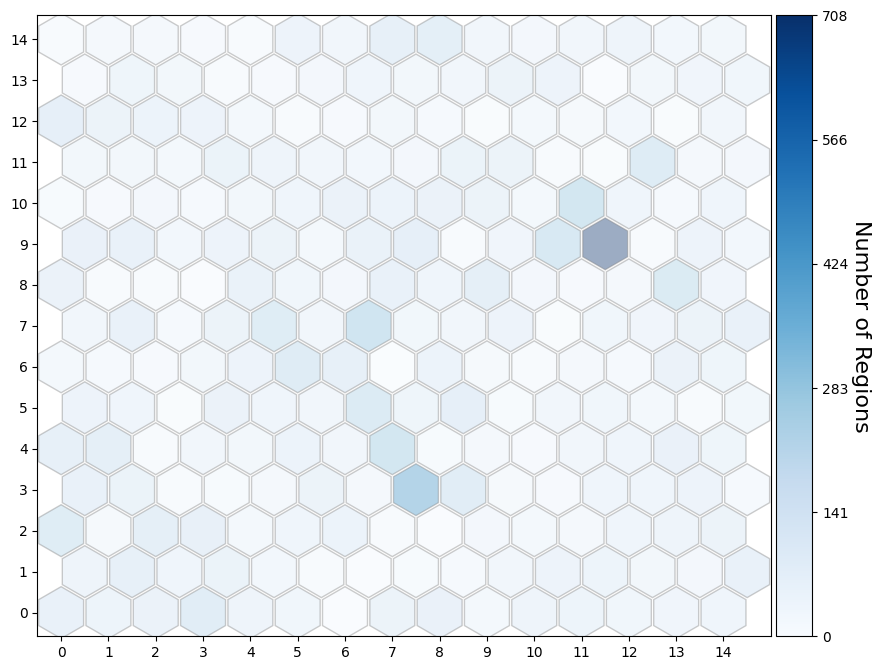

In [7]:
plot = laytr.make_hex_plot(som, hue=umatrix, hue_label="Number of Regions", hue_count_ticks=True)

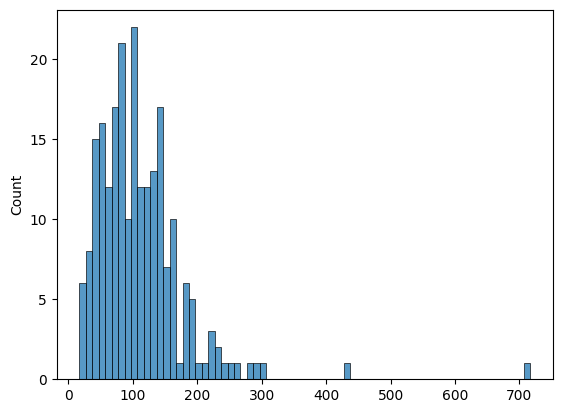

In [6]:
p = sb.histplot(np.ravel(umatrix), binwidth=10)